# Which US cities Americans are fleeing -- and which are luring more

So, I wanted to look at public housing in Atlanta -- and maybe it's affect on homelessness -- but after spending all of lab on Monday and a good chunk on Tuesday searching online and calling the housing authority, I abandoned this due to lack of data (or at least, a lack of ability to find it).

I pivoted quickly to Census data on population change in US cities with 50,000 or more people. I searched for a table of what I wanted on the Census website and then exported it as a csv. I opened the csv in Sublime and chopped off a garbage topline of weird metavalues, then opened it here with pandas. I dropped columns I didn't need and renamed those I did. I also created a new column for state to have the option to do analysis at that level.

The results are actually marginally interesting, at least to me. Four out of the five that saw the biggest number drop in population are major American cities. Three out of the five that added the most are in Texas.

My "nice-to-have" improvements would be more data and analysis: I'd like to try to get at why by probing number of jobs added (or lost) and other economic factors in the cities I'm looking at. I've also located Census on population change that compares the current number to 2010 levels, and the largest slice of time would likely produce more interesting results. More analysis would be needed of course to pay off/confirm using "fleeing" and "luring" in the above headline.

In [49]:
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv("CLEANER_pop_change.csv")

In [3]:
df.shape

(758, 12)

In [4]:
df

Id  Id2      Geography     Target Geo Id  Target Geo Id2  Rank  \
0    0100000US  NaN  United States  1620000US4827684         4827684     1   
1    0100000US  NaN  United States  1620000US4850820         4850820     2   
2    0100000US  NaN  United States  1620000US4857176         4857176     3   
3    0100000US  NaN  United States  1620000US1902305         1902305     4   
4    0100000US  NaN  United States  1620000US0407940          407940     5   
5    0100000US  NaN  United States  1620000US4829336         4829336     6   
6    0100000US  NaN  United States  1620000US0812415          812415     7   
7    0100000US  NaN  United States  1620000US4727740         4727740     8   
8    0100000US  NaN  United States  1620000US4845744         4845744     9   
9    0100000US  NaN  United States  1620000US1652120         1652120    10   
10   0100000US  NaN  United States  1620000US4826232         4826232    11   
11   0100000US  NaN  United States  1620000US4105800         4105800    12   
12   0100000US  NaN  United States  1620000US4813552         4813552    13   
13   0100000US  NaN  United States  1620000US1217935         1217935    14   
14   0100000US  NaN  United States  1620000US1224125         1224125    15   
15   0100000US  NaN  United States  1620000US0636770          636770    16   
16   0100000US  NaN  United States  1620000US0629504          629504    17   
17   0100000US  NaN  United States  1620000US4846452         4846452    18   
18   0100000US  NaN  United States  1620000US4751560         4751560    19   
19   0100000US  NaN  United States  1620000US0639486          639486    20   
20   0100000US  NaN  United States  1620000US3231900         3231900    21   
21   0100000US  NaN  United States  1620000US4830644         4830644    22   
22   0100000US  NaN  United States  1620000US4822660         4822660    23   
23   0100000US  NaN  United States  1620000US4965330         4965330    24   
24   0100000US  NaN  United States  1620000US4816432         4816432    25   
25   0100000US  NaN  United States  1620000US0662364          662364    26   
26   0100000US  NaN  United States  1620000US4548535         4548535    27   
27   0100000US  NaN  United States  1620000US4970850         4970850    28   
28   0100000US  NaN  United States  1620000US4944320         4944320    29   
29   0100000US  NaN  United States  1620000US1207525         1207525    30   
..         ...  ...            ...               ...             ...   ...   
728  0100000US  NaN  United States  1620000US0150000          150000   729   
729  0100000US  NaN  United States  1620000US1772000         1772000   730   
730  0100000US  NaN  United States  1620000US5585300         5585300   731   
731  0100000US  NaN  United States  1620000US3977000         3977000   732   
732  0100000US  NaN  United States  1620000US4975360         4975360   733   
733  0100000US  NaN  United States  1620000US1827000         1827000   734   
734  0100000US  NaN  United States  1620000US1724582         1724582   735   
735  0100000US  NaN  United States  1620000US1754820         1754820   736   
736  0100000US  NaN  United States  1620000US0651182          651182   737   
737  0100000US  NaN  United States  1620000US1831000         1831000   738   
738  0100000US  NaN  United States  1620000US1751089         1751089   739   
739  0100000US  NaN  United States  1620000US3757500         3757500   740   
740  0100000US  NaN  United States  1620000US1770122         1770122   741   
741  0100000US  NaN  United States  1620000US4261000         4261000   742   
742  0100000US  NaN  United States  1620000US2404000         2404000   743   
743  0100000US  NaN  United States  1620000US1718823         1718823   744   
744  0100000US  NaN  United States  1620000US2205000         2205000   745   
745  0100000US  NaN  United States  1620000US1705573         1705573   746   
746  0100000US  NaN  United States  1620000US1714351         1714351   747   
747  0100000US  NaN  United States

In [5]:
# cl_df = cl_df.drop(['name'], axis=1)
# cols = ['name', 'court', 'incumbent', 'vacancy_date', 'vacancy_reason', 'nom_date', 'confirm_date']
# df = df[cols]
# df
columns = df.columns.values.tolist()
columns

['Id',
 'Id2',
 'Geography',
 'Target Geo Id',
 'Target Geo Id2',
 'Rank',
 'Geography.1',
 'Geography.2',
 'Population Estimate (as of July 1) - 2016',
 'Population Estimate (as of July 1) - 2017',
 'Change, 2016 to 2017 - Number',
 'Change, 2016 to 2017 - Percent [1]']

In [6]:
my_cols = ['Geography.2', 'Population Estimate (as of July 1) - 2016', 'Population Estimate (as of July 1) - 2017', 'Change, 2016 to 2017 - Number', 'Change, 2016 to 2017 - Percent [1]']

In [7]:
df = df[my_cols]
df.head()

Geography.2  Population Estimate (as of July 1) - 2016  \
0         Frisco city, Texas                                     163816   
1  New Braunfels city, Texas                                      73319   
2   Pflugerville city, Texas                                      59507   
3          Ankeny city, Iowa                                      58639   
4      Buckeye city, Arizona                                      64639   

   Population Estimate (as of July 1) - 2017  Change, 2016 to 2017 - Number  \
0                                     177286                          13470   
1                                      79152                           5833   
2                                      63359                           3852   
3                                      62416                           3777   
4                                      68453                           3814   

   Change, 2016 to 2017 - Percent [1]  
0                                 8.2  
1                                 8.0  
2                                 6.5  
3                                 6.4  
4                                 5.9

In [8]:
df.rename(index=str, columns={"Geography.2": "City"}, inplace=True)
df.head()

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


City  Population Estimate (as of July 1) - 2016  \
0         Frisco city, Texas                                     163816   
1  New Braunfels city, Texas                                      73319   
2   Pflugerville city, Texas                                      59507   
3          Ankeny city, Iowa                                      58639   
4      Buckeye city, Arizona                                      64639   

   Population Estimate (as of July 1) - 2017  Change, 2016 to 2017 - Number  \
0                                     177286                          13470   
1                                      79152                           5833   
2                                      63359                           3852   
3                                      62416                           3777   
4                                      68453                           3814   

   Change, 2016 to 2017 - Percent [1]  
0                                 8.2  
1                                 8.0  
2                                 6.5  
3                                 6.4  
4                                 5.9

In [9]:
df.rename(index=str, columns={"Population Estimate (as of July 1) - 2016": "2016_Pop"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
df.rename(index=str, columns={"Population Estimate (as of July 1) - 2017": "2017_Pop"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:
df.rename(index=str, columns={"Change, 2016 to 2017 - Number": "Pop_Change"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
df.rename(index=str, columns={"Change, 2016 to 2017 - Percent [1]": "Percent_Change"}, inplace=True)

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [29]:
df['City'] = df.City.str.replace(" city", "")

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df['State'] = df.City.str.split(", ").str[1]

/Users/matthewrehbein/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df.head()

City  2016_Pop  2017_Pop  Pop_Change  Percent_Change  \
0         Frisco, Texas    163816    177286       13470             8.2   
1  New Braunfels, Texas     73319     79152        5833             8.0   
2   Pflugerville, Texas     59507     63359        3852             6.5   
3          Ankeny, Iowa     58639     62416        3777             6.4   
4      Buckeye, Arizona     64639     68453        3814             5.9   

     State  
0    Texas  
1    Texas  
2    Texas  
3     Iowa  
4  Arizona

In [33]:
df.to_csv("my_pop_df.csv", index=False)

In [19]:
df.dtypes

City               object
2016_Pop            int64
2017_Pop            int64
Pop_Change          int64
Percent_Change    float64
dtype: object

In [34]:
# which US cities gained the most ppl and which lost most?
df.sort_values(by='Percent_Change', ascending=False).head()

City  2016_Pop  2017_Pop  Pop_Change  Percent_Change  \
0         Frisco, Texas    163816    177286       13470             8.2   
1  New Braunfels, Texas     73319     79152        5833             8.0   
2   Pflugerville, Texas     59507     63359        3852             6.5   
3          Ankeny, Iowa     58639     62416        3777             6.4   
4      Buckeye, Arizona     64639     68453        3814             5.9   

     State  
0    Texas  
1    Texas  
2    Texas  
3     Iowa  
4  Arizona

In [35]:
df.sort_values(by='Percent_Change').head()

City  2016_Pop  2017_Pop  Pop_Change  Percent_Change  \
757        Casper, Wyoming     58906     57814       -1092            -1.9   
756    St. Louis, Missouri    313144    308626       -4518            -1.4   
754       Peoria, Illinois    114351    112883       -1468            -1.3   
755         Enid, Oklahoma     50785     50122        -663            -1.3   
753  Shreveport, Louisiana    194394    192036       -2358            -1.2   

         State  
757    Wyoming  
756   Missouri  
754   Illinois  
755   Oklahoma  
753  Louisiana

In [36]:
df.sort_values(by='Pop_Change', ascending=False).head()

City  2016_Pop  2017_Pop  Pop_Change  Percent_Change  \
143       San Antonio, Texas   1487738   1511946       24208             1.6   
167         Phoenix, Arizona   1602042   1626078       24036             1.5   
183            Dallas, Texas   1322140   1341075       18935             1.4   
82         Fort Worth, Texas    855504    874168       18664             2.2   
408  Los Angeles, California   3981116   3999759       18643             0.5   

          State  
143       Texas  
167     Arizona  
183       Texas  
82        Texas  
408  California

In [37]:
df.sort_values(by='Pop_Change').head()

City  2016_Pop  2017_Pop  Pop_Change  \
742             Baltimore, Maryland    616958    611648       -5310   
756             St. Louis, Missouri    313144    308626       -4518   
611               Chicago, Illinois   2720275   2716450       -3825   
749  Anchorage municipality, Alaska    297376    294356       -3020   
741        Pittsburgh, Pennsylvania    305017    302407       -2610   

     Percent_Change         State  
742            -0.9      Maryland  
756            -1.4      Missouri  
611            -0.1      Illinois  
749            -1.0        Alaska  
741            -0.9  Pennsylvania

AttributeError: 'DataFrame' object has no attribute 'tick_params'

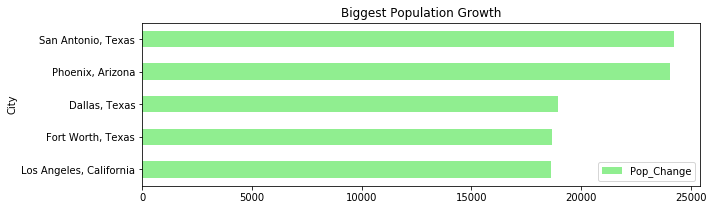

In [85]:
ax = df.sort_values(by='Pop_Change', ascending=False).head()
ax.sort_values(by='Pop_Change', ascending=True).plot(kind='barh', color='lightgreen', x='City', y='Pop_Change', figsize=(10,3), title="Biggest Population Growth")

# ax.set_title("Biggest Population Growth", pad=40)
# ax.title.set_fontsize(30)
# ax.title.set_fontname("Big Caslon")

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['right'].set_visible(False)

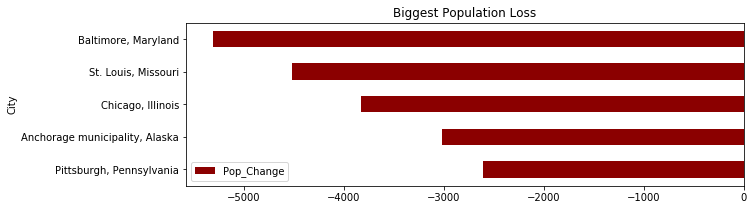

In [82]:
ax2 = df.sort_values(by='Pop_Change').head()
ax2.sort_values(by='Pop_Change', ascending=False).plot(kind='barh', color='darkred', x='City', y='Pop_Change', figsize=(10,3), title="Biggest Population Loss")

In [61]:
# all_gains = df[~df['Pop_Change'].str.contains('-')]
all_gains = df[df['Pop_Change'] > 0]
bigger_cities_by_state = all_gains.State.value_counts()

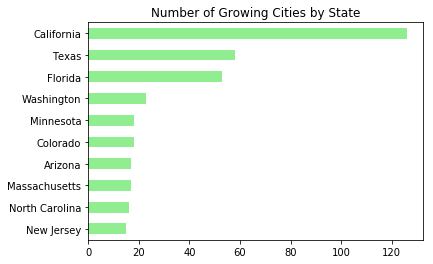

In [86]:
bigger_cities_by_state.head(10).sort_values(ascending=True).plot(kind='barh', color='lightgreen', title='Number of Growing Cities by State')

In [65]:
bigger_cities_by_state.plot(kind='scatter')
# df.plot.scatter('x', 'y')

ValueError: plot kind 'scatter' can only be used for data frames